In [1]:
import http.client
import json
import pandas as pd
from pymongo import MongoClient
from sklearn.preprocessing import MinMaxScaler  # Add this import statement
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Data Uploading

# ETL Process:

In [2]:
from pymongo import MongoClient
import pandas as pd

def extract_data_from_mongodb(HealthCare, DeathRelatedDrug):
    # Connect to MongoDB
    client = MongoClient('localhost', 27017)
    db = client[HealthCare]
    collection = db[DeathRelatedDrug]

    try:
        # Extract data from MongoDB collection
        data = list(collection.find())
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

# Example usage
extracted_data = extract_data_from_mongodb('HealthCare', 'DeathRelatedDrug')

# Convert data to DataFrame
df = pd.DataFrame(extracted_data)


# Print DataFrame
print(df.head())

Data extracted successfully from MongoDB.
                        _id CaseNumber        Date     Sex   Race Age  \
0  66267d31da81114bd3e4b661   13-16336  11/09/2013  Female  White  53   
1  66267d31da81114bd3e4b662   12-18447  12/29/2012    Male  White  30   
2  66267d31da81114bd3e4b663    14-2758  02/18/2014    Male  White  43   
3  66267d31da81114bd3e4b664   14-13497  09/07/2014  Female  White  24   
4  66267d31da81114bd3e4b665   13-14421  10/04/2013  Female  White  26   

  Residence City Residence State Residence County   Death City  ...  \
0         GROTON                       NEW LONDON       GROTON  ...   
1        WOLCOTT                        NEW HAVEN    WATERBURY  ...   
2        ENFIELD                                       ENFIELD  ...   
3    WALLINGFORD                                   WALLINGFORD  ...   
4     WEST HAVEN                        NEW HAVEN   WEST HAVEN  ...   

  Benzodiazepine Methadone Amphet Tramad Morphine (not heroin) Other  \
0              Y    

In [3]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Replace 'localhost:27017' with your MongoDB URI

# Select the appropriate database and collection
db = client['your_database_name']  # Replace 'your_database_name' with your actual database name
collection = db['your_collection_name']  # Replace 'your_collection_name' with your actual collection name

# Query data from MongoDB and convert it into a DataFrame
cursor = collection.find()
df = pd.DataFrame(list(cursor))

# Standardize column names
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

# Display the first few rows of the DataFrame
print(df.head())

import pandas as pd
import pymongo

def retrieve_data_from_mongodb(db_name, collection_name):
    # Establish connection to MongoDB
    client = pymongo.MongoClient("localhost", 27017)
    
    # Access the database
    db = client[db_name]
    
    # Access the collection
    collection = db[collection_name]
    
    # Retrieve all documents from the collection
    cursor = collection.find({})
    
    # Convert cursor to list of dictionaries
    data = list(cursor)
    
    return data

def data_understanding(data):
    # Convert data to DataFrame
    df = pd.DataFrame(data)
    
    # Display basic statistics
    statistics = df.describe()
    statistics_styled = statistics.style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('border', '1px solid #ddd')]},
        {'selector': 'td', 'props': [('border', '1px solid #ddd')]},
        {'selector': 'caption', 'props': [('font-size', '14px'), ('color', 'black'), ('font-weight', 'bold')]}
    ])
    
    # Display data types and missing values
    data_info = df.info()
    
    return statistics_styled, data_info

# Define the database name and collection name
db_name = "HealthCare"
collection_name = "DeathRelatedDrug"

# Retrieve data from MongoDB
data = retrieve_data_from_mongodb(db_name, collection_name)

# Perform data understanding and display the results
statistics_styled, data_info = data_understanding(data)

# Display styled statistics table
statistics_styled


Empty DataFrame
Columns: []
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   _id                    4081 non-null   object
 1   CaseNumber             4081 non-null   object
 2   Date                   4081 non-null   object
 3   Sex                    4081 non-null   object
 4   Race                   4081 non-null   object
 5   Age                    4081 non-null   object
 6   Residence City         4081 non-null   object
 7   Residence State        4081 non-null   object
 8   Residence County       4081 non-null   object
 9   Death City             4081 non-null   object
 10  Death State            4081 non-null   object
 11  Death County           4081 non-null   object
 12  Location               4081 non-null   object
 13  DescriptionofInjury    4081 non-null   object
 14  InjuryPlace            4081 non-nu

,_id,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,Location,DescriptionofInjury,InjuryPlace,ImmediateCauseA,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
count,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081
unique,4081,4078,1764,3,12,63,450,20,85,307,10,18,6,115,68,2155,3,3,6,3,2,3,3,3,3,2,2,6,96,4,6,437,338
top,66267d31da81114bd3e4b661,17-538,08/18/2017,Male,White,29,HARTFORD,CT,HARTFORD,HARTFORD,,,Residence,,Residence,Substance Abuse,Y,,,,,,,,,,,,,,Accident,,"HARTFORD, CT (41.765775, -72.673356)"
freq,1,2,9,2991,3243,121,206,2052,784,371,1881,1182,2123,2588,2833,276,2122,2908,2617,3551,3985,3161,3977,3052,3696,3979,3991,4043,3736,3388,4047,3543,313


Retrieve Data from MongoDB:

In [4]:
# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")  # Replace with your MongoDB URI

# Select database and collection
db = client["HealthCare"]  # Replace with your database name
collection = db["DeathRelatedDrug"]  # Replace with your collection name

# Retrieve data
cursor = collection.find()



# Style the DataFrame
styled_df = df.style.set_properties(**{'border': '1px solid black', 'border-collapse': 'collapse'}).set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]}])

# Display styled DataFrame
styled_df



In [5]:
# 1. Handle Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Handle missing values based on your specific scenario (imputation, removal, etc.)



Missing values:
Series([], dtype: float64)


In [6]:
# 2. Handle Duplicate Records
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nDuplicate rows:")
print(duplicate_rows)

# Remove duplicate rows
df.drop_duplicates(inplace=True)




Duplicate rows:
0


""


In [7]:
# 3. Convert Data Types
# Check data types of columns
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Series([], dtype: object)


In [8]:

# Convert data types if needed using methods like astype(), pd.to_numeric(), pd.to_datetime(), etc.

# 4. Check for Outliers (if applicable)
# Identify and handle outliers based on your specific scenario

# 5. Normalize/Standardize Data (if applicable)
# Normalize or standardize numerical columns if needed

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Cleaned DataFrame:
Empty DataFrame
Columns: []
Index: []


In [9]:
import pandas as pd
import pymongo
import numpy as np
from scipy.stats import zscore, pearsonr

# Function to retrieve data from MongoDB
def retrieve_data_from_mongodb(HealthCare, DeathRelatedDrug):
    # Establish connection to MongoDB
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    
    # Access the database
    db = client[db_name]
    
    # Access the collection
    collection = db[collection_name]
    
    # Retrieve all documents from the collection
    cursor = collection.find({})
    
    # Convert cursor to list of dictionaries
    data = list(cursor)
    
    return data

# Retrieve data from MongoDB
data = retrieve_data_from_mongodb("HealthCare", "DeathRelatedDrug")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate z-scores for each numeric column
z_scores = numeric_columns.apply(zscore)

# Print z-scores
print("Z-scores:")
print(z_scores)


Z-scores:
Series([], dtype: float64)


In [10]:
import json
import pandas as pd

# Define a function to load the JSON dataset
def load_json_dataset(death_related_drug):
    try:
        with open('death_related_drug.json', 'r') as file:
            data = json.load(file)
        return data
        print(f"Error: File '{death_related_drug.json}' not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: Unable to decode JSON from '{death_related_drug.json}'.")
        return None

# Define a function to convert the loaded data to a DataFrame
def create_dataframe(data):
    try:
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error: Unable to create DataFrame. {e}")
        return None

# Define a function to perform data manipulation
def manipulate_data(df):
    try:
        # Add your data manipulation code here
        # For example, you can perform operations like filtering, sorting, or transforming the DataFrame
        manipulated_df = df.copy()  # Placeholder, replace with actual manipulation steps
        return manipulated_df
    except Exception as e:
        print(f"Error: Data manipulation failed. {e}")
        return None

# Define the file path
file_path = 'death_related_drug.json'

# Load the JSON dataset
data = load_json_dataset(file_path)

# Check if data was successfully loaded
if data:
    # Create a DataFrame from the loaded data
    df = create_dataframe(data)
    
    # Check if DataFrame was successfully created
    if df is not None:
        # Perform data manipulation
        manipulated_df = manipulate_data(df)
        
        # Check if data manipulation was successful
        if manipulated_df is not None:
            # Display the manipulated DataFrame
            print("Manipulated DataFrame:")
            print(manipulated_df.head())
        else:
            print("Data manipulation failed.")
    else:
        print("DataFrame creation failed.")
else:
    print("Data loading failed.")


Manipulated DataFrame:
         Date      Date Type Age     Sex   Race Ethnicity Residence City  \
0  05/29/2012  Date of death  37    Male  Black                 STAMFORD   
1  06/27/2012  Date of death  37    Male  White                  NORWICH   
2  03/24/2014  Date of death  28    Male  White                   HEBRON   
3  12/31/2014  Date of death  26  Female  White                   BALTIC   
4  01/16/2016  Date of death  41    Male  White                  SHELTON   

  Residence County Residence State Injury City  ... Xylazine Gabapentin  \
0        FAIRFIELD                    STAMFORD  ...                       
1       NEW LONDON                     NORWICH  ...                       
2                                       HEBRON  ...                       
3                                               ...                       
4        FAIRFIELD              CT     SHELTON  ...                       

  Opiate NOS Heroin/Morph/Codeine Other Opioid Any Opioid Other  \
0 

In [11]:
from pymongo import MongoClient

def extract_data_from_mongodb(db_name, collection_name):
    try:
        # Connect to MongoDB
        client = MongoClient('localhost', 27017)
        db = client[db_name]
        collection = db[collection_name]
        
        # Extract data from MongoDB collection
        data = list(collection.find())
        print("Data extracted successfully from MongoDB.")
        return data
    except Exception as e:
        print("An error occurred:", e)
    finally:
        # Close the MongoDB connection
        client.close()

def validate_data(data):
    if not data:
        print("No data to validate.")
        return
    
    # Perform data validation
    validation_errors = []
    for document in data:
        # Example validation checks (customize as per your dataset and requirements)
        if not isinstance(document.get('age'), int) or document.get('age') < 0:
            validation_errors.append(f"Invalid age: {document.get('age')} in document: {document}")
        # Add more validation checks as needed
        
    if validation_errors:
        print("Validation errors found:")
        for error in validation_errors:
            print(error)
    else:
        print("Data validation successful. No errors found.")

# Example usage
db_name = 'HealthCare'
collection_name = 'DeathRelatedDrug'
extracted_data = extract_data_from_mongodb(db_name, collection_name)
validate_data(extracted_data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# EDA

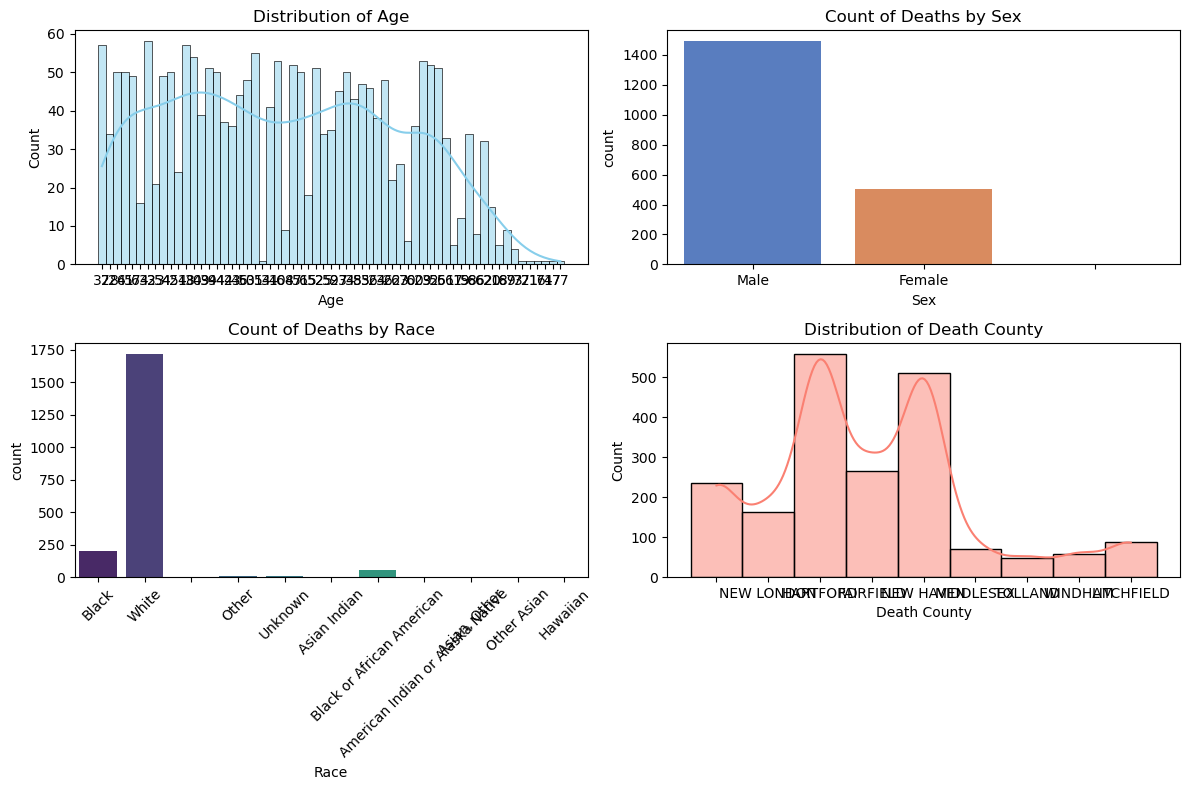

In [12]:

# Visualize the overall trends for the first 20 records
plt.figure(figsize=(12, 8))

# Plot 1: Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')

# Plot 2: Count of Deaths by Sex
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Sex', palette='muted')
plt.title('Count of Deaths by Sex')

# Plot 3: Count of Deaths by Race
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Race', palette='viridis')
plt.title('Count of Deaths by Race')
plt.xticks(rotation=45)

# Plot 4: Distribution of Death County
plt.subplot(2, 2, 4)
sns.histplot(df['Death County'], bins=5, kde=True, color='salmon')
plt.title('Distribution of Death County')

plt.tight_layout()
plt.show()


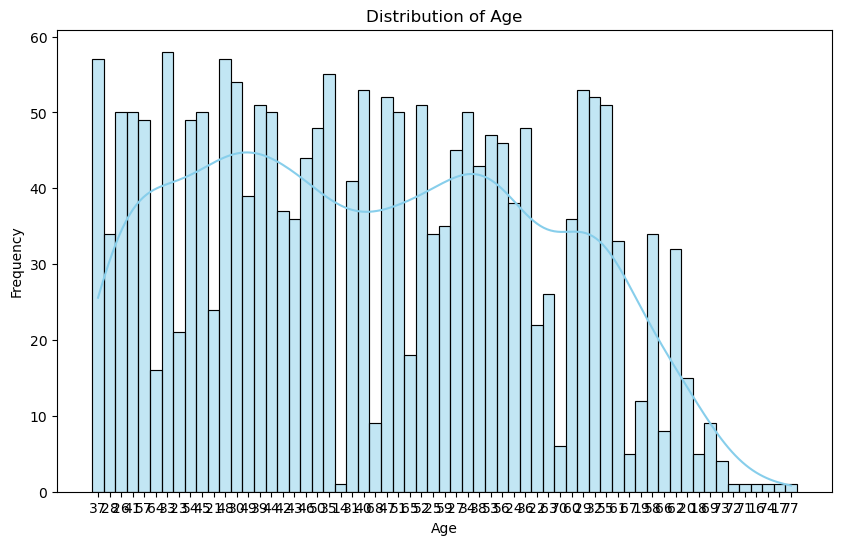

In [13]:
# Data Visualization
# Check if 'Age' column exists before plotting
if 'Age' in df.columns:
    # Example: Histogram of Age
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], kde=True, bins=10, color='skyblue')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Age' does not exist in the DataFrame.")


In [14]:
# Select the columns for the pie chart
columns_for_pie_chart = ['Date','CaseNumber', 'Age', 'Race', 'Death City']

# Filter the DataFrame to include only the selected columns
df_for_pie_chart = df[columns_for_pie_chart]

# Plot a pie chart for each selected column
for column in columns_for_pie_chart:
    plt.figure(figsize=(8, 6))
    counts = df_for_pie_chart[column].value_counts()
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()


KeyError: "['CaseNumber'] not in index"

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient

# Connect to MongoDB and retrieve data
client = MongoClient('localhost', 27017)
db = client['HealthCare']  # Replace 'your_database_name' with your actual database name
collection = db['DeathRelatedDrug']  # Replace 'your_collection_name' with your actual collection name
cursor = collection.find()
data = pd.DataFrame(list(cursor))

# Check for NaN values in the data and handle them if necessary
numeric_data = data.select_dtypes(include=['number'])
numeric_data.fillna(0, inplace=True)  # Fill NaN values with 0, you can choose a different value or method as needed

# Check if numeric_data is empty
if numeric_data.empty:
    print("DataFrame is empty. Cannot create heatmap.")
else:
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()


In [ ]:
pip install folium

In [ ]:

import folium
import pandas as pd
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Update with your MongoDB connection URI
db = client['HealthCare']  # Update with your database name
collection = db['DeathReleatedDrug']  # Update with your collection name

# Query data from MongoDB
cursor = collection.find({})  # Example: Retrieve all documents
data = list(cursor)

# Create a DataFrame
df = pd.DataFrame(data)

# Create a map centered around a specific location
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)  # Example: Centered around New York City

# Add markers for each data point (assuming latitude, longitude, and drug_name columns exist in DataFrame)
for index, row in df.iterrows():
    popup_text = f"Location: {row['location_name']}\nDrug: {row['drug_name']}"  # Construct popup text
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text).add_to(m)

# Display the map
m




In [ ]:

# Count of Deaths by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', palette='muted')
plt.title('Count of Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Race', palette='viridis')
plt.title('Count of Deaths by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Death County'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Death County')
plt.xlabel('Death County')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and it contains a 'Date' column indicating the date of each incident

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month to get the count of deaths for each period
death_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Deaths')

# Plot the trend of deaths over time
plt.figure(figsize=(12, 6))
plt.plot(death_trend['Date'], death_trend['Deaths'], marker='o', linestyle='-')
plt.title('Trend of Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and it contains a 'Date' column indicating the date of each incident

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month to get the count of deaths for each period
death_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Deaths')

# Plot the trend of deaths over time
plt.figure(figsize=(12, 6))
plt.plot(death_trend['Date'], death_trend['Deaths'], marker='o', linestyle='-')
plt.title('Trend of Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
